# Part One
## Creation of wordList
1. Opened file in read only mode but had to change the incoding, (default: utf-8) due to error. 
2. Creation of variable to contain to text in the book, and .read() method used to read the file and .lower() used to make all the characters lowercase to avoid words that are the same being counted differetly.
3. For loop used to remove the special characters '"' and ',' from the text to avoid miss counts in words. 
4. Creation of new variable wordList which uses the .split() to seperate each word in our text to be used in the list.

In [1]:

# encoding changed due to error. default open is 'utf-8' but for my text file, encoding was 'iso-8859-1
with open('GatsbyBook.txt', 'r', encoding= 'ISO-8859-1') as file: 

    bookText = file.read() # reads contents of the file 

    bookText = bookText.lower() # makes all characters lowercase

    for char in ['"', ',', '.', '-']: # loop that iterates over each character in the list
        bookText = bookText.replace(char, '') # replaces each of the charachters with empty space

    wordList = bookText.split() # split() method used to create list that splits on white space

wordList[:15] # show the wordList



['in',
 'my',
 'younger',
 'and',
 'more',
 'vulnerable',
 'years',
 'my',
 'father',
 'gave',
 'me',
 'some',
 'advice',
 'that',
 'iâ\x80\x99ve']

# Part Two
## Creation of Dataframe

1. This sction of code is used to create a Dataframe that hold the count of each word in the wordList that we created above. 
2. An empty Dictonary is initalized and used to hold the count of each word. 
3. A for loop iterates over each word in our wordList, and a conditional if statement is used to either add one to the count, or add the word to the count if its the first time the word has appeared. 
4. Using the pandas library, we then create a dataFrame from the items in wordCount dictonary. The items in a dictorary are tupled together, making creating the dataframe with the words count easier.

In [2]:
import pandas as pd

wordCount = {} # empty dictonary used for count and dataframe creation

for word in wordList: # iterate over each word in the wordList
    if word in wordCount: # if the word is already in the dictonary
        wordCount[word] += 1 # add to count
    else:
        wordCount[word] = 1 # start the word count 

dataFrame = pd.DataFrame(list(wordCount.items()), columns= ["Word", "Times in text"]) # creation of dataFrame using tuples from the dictonary with their updated counts 

dataFrame # show the dataframe working 

C:\Users\Jacob K\AppData\Local\Temp\ipykernel_2080\2068505109.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Word,Times in text
0,in,789
1,my,235
2,younger,2
3,and,1500
4,more,71
...,...,...
7455,matterâtomorrow,1
7456,morningâ,1
7457,boats,1
7458,current,1


# Part Three
## Stop Words and newDataFrame(decending)
1. In this section of the project, a list of stop words were given to us. We were tasked with removing these stop words as well as any others that may cause issued in the future parts of the project. 
2. The list of stop words are initalized as stop_words which we will be filtering out. 
3. A newDataFrame is created by filtering out rows from our original dataframe ("Word" is the column specified) with any of the stop_words in the list. and the ~ is utilized with the .isin() method to invert the result. 
4. Example: if the word you are comparing is a stop_word, normally the result would be a boolean True, but by using the '~' it becomes false and removes it from our newDataFrame. 
5. The newDataFrame is then sorted by the 'Times in text' column, and set in descending order.

In [65]:
import pandas as pd 

stop_words = ["âi", "didnât", "looked", "man", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "his","her","him","she","they","them","hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "i","ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

newDataFrame = dataFrame[~dataFrame["Word"].isin(stop_words)] # creationg of new dataframe, .isin() boolean method used to return if the word is a stop word, and removes it. 

newDataFrame = newDataFrame.sort_values(by='Times in text', ascending=False) # sort by descending order

newDataFrame.reset_index(drop=True, inplace=True) # resets index and drop the old index

print(newDataFrame[:15]) # prints the top 15 word in the dataframe
newDataFrame.count() # shows me the total count for the newDataFrame

          Word  Times in text
0       gatsby            170
1          tom            162
2        daisy            135
3         eyes             85
4        house             84
5         know             83
6      donât             73
7         time             71
8       moment             68
9   gatsbyâs             67
10         see             65
11        door             65
12      turned             64
13       other             63
14   something             63


Word             7029
Times in text    7029
dtype: int64

#Part 4
## Plotting our results
1. To finish this assignemnt, we were tasked with plotting the frequency of the top 6 words in our book as a ratio of the entire book. To begin, I created a list using our text and utilized the .split() method to change the delimiter to be 'chapter'
2. Next I created a function called calcRatio. This function was created to be used with a for loop to walk through the list of my top 6 words. I generate a total word count from my text and create an empty dictornary which will hold the values for our ratios. 
3. A for loop is then utilized which iterates through each chapter in our 'chapters' list. We use the enumerates() function to get both indexes (i and chapters[]). We then count the number of times the word appears in the current chapter, and do a simple calculation to find the ratio which is then saved as a variable. The wordRatio dictonary is stored with the chapter number used as the key using an f string to format it all. We finish by returning the wordRatio dictonary as a whole which would contain the chapters and word ratios of any word passed into it. 
4. Outside of our now created function, we have our list of words that are most frequently used in the book. Using another for loop, which iterates over each word in our topSix list, we call on our function calcRatio() which stores the ratios. Next we create a bar graph for the word we are iterating over. .keys() and the .values() methods are used to get the key and value from our dictonary and plot them on the x and y-axis. For readability, lables and a title are added for each plot in the loop.  

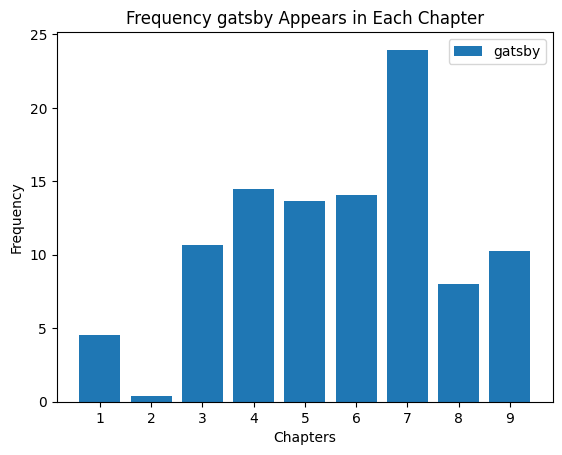

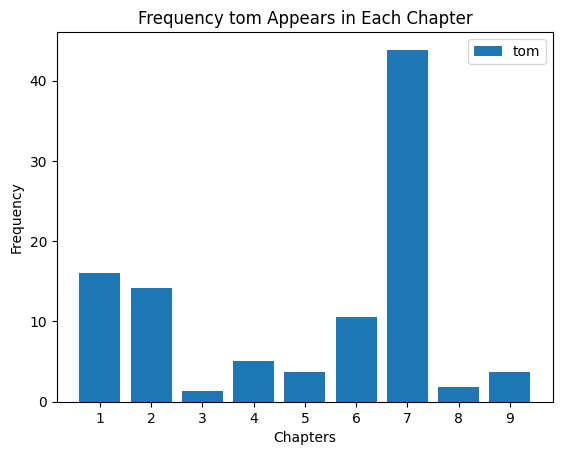

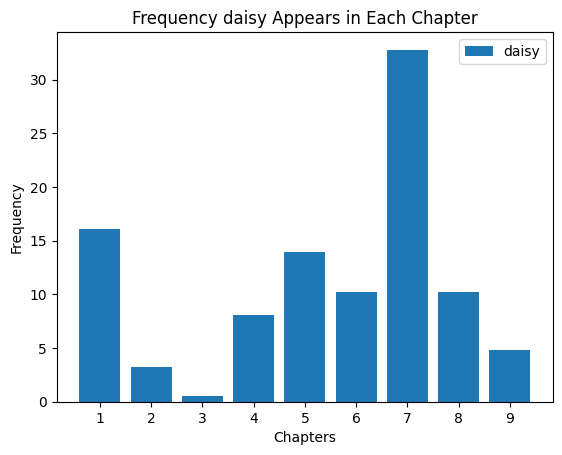

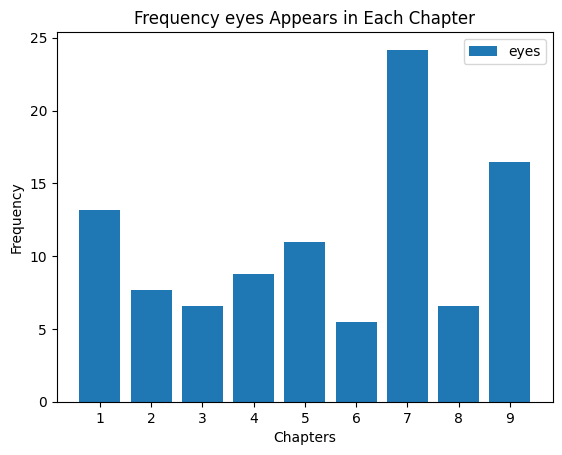

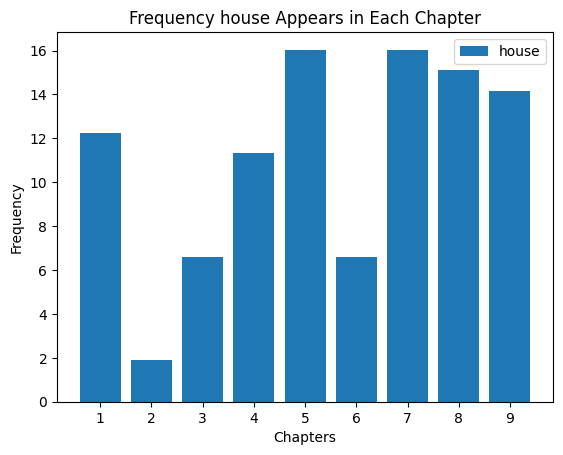

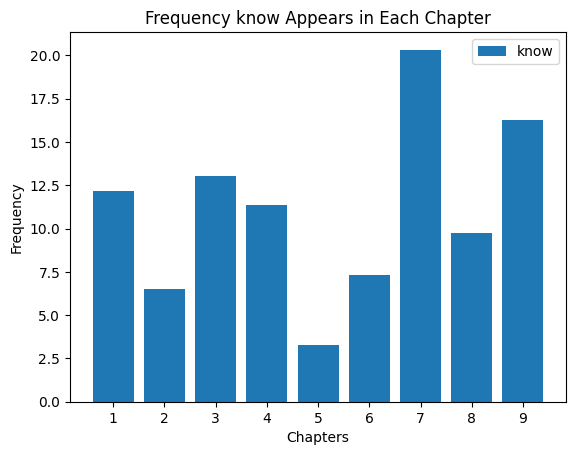

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

chapters = bookText.split('chapter') # splits the bookText into a list of each chapter

def calcRatio(word): # defining function that takes a word as its arguement 

    totalWordCount = bookText.count(word) # counts the total number of workds in the text file 

    wordRatio = {} # empty dictonary created to hold values for the ratios 
    
    for i, chapter in enumerate(chapters): # loops that iterates through each chapter in the 'chapters' list. enumerate() function used to get both index i and chapter[] from the list.
        chapterWordCount = chapter.count(word) # counts the number of times word appears in the chapter
        ratio = (chapterWordCount / totalWordCount)* 100 # simple calulation to get ratio as percentage
        wordRatio[f"{i+1}"] = ratio # stores the ratio in the dictornary with the chapter number as the key

    return wordRatio # returns the dictonary containing the raions of the words in each chapter.
""
topSix = ["gatsby", "tom", "daisy", "eyes", "house", "know"] # defines the list of our top 6 words

for word in topSix: # for loop that iterates through each word in the list of top 6 words.
    ratios = calcRatio(word) # calls on the function above with the current word in the loop as the arguement. and stores the resuts as ratios. 
    plt.bar(ratios.keys(), ratios.values(), label=word) #uses keys and values for the plot of the bar graph
    plt.xlabel('Chapters')
    plt.ylabel('Frequency')
    plt.title(f'Frequency {word} Appears in Each Chapter')
    plt.legend()
    plt.show()



    



